In [2]:
# Importing all necessary libraries

import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('expand_frame_repr', False)

import numpy as np
import os
from dateutil import relativedelta
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Reading the config file
exec(open("config.py").read())

In [3]:
cwd = os.getcwd()
input_dir = cwd + '\\input\\'
output_dir = cwd + '\\output\\'

In [10]:
train = pd.read_csv(input_dir + 'train.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


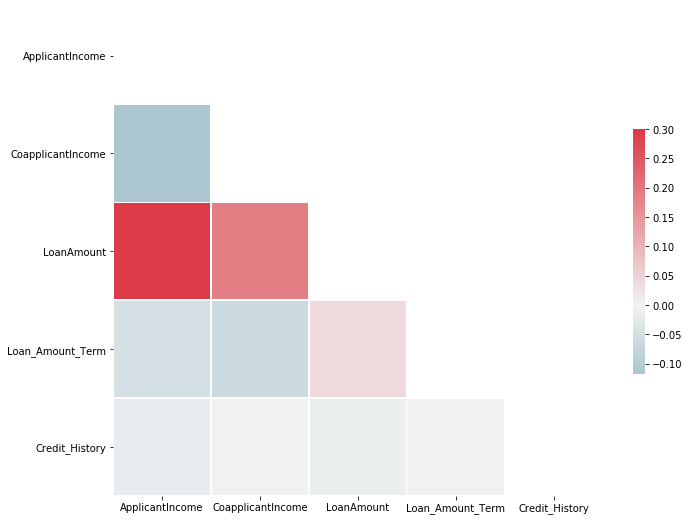

In [5]:
numericCols = train.select_dtypes(include=['float64','int64'])

# Calculate Correlation
corr = numericCols.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

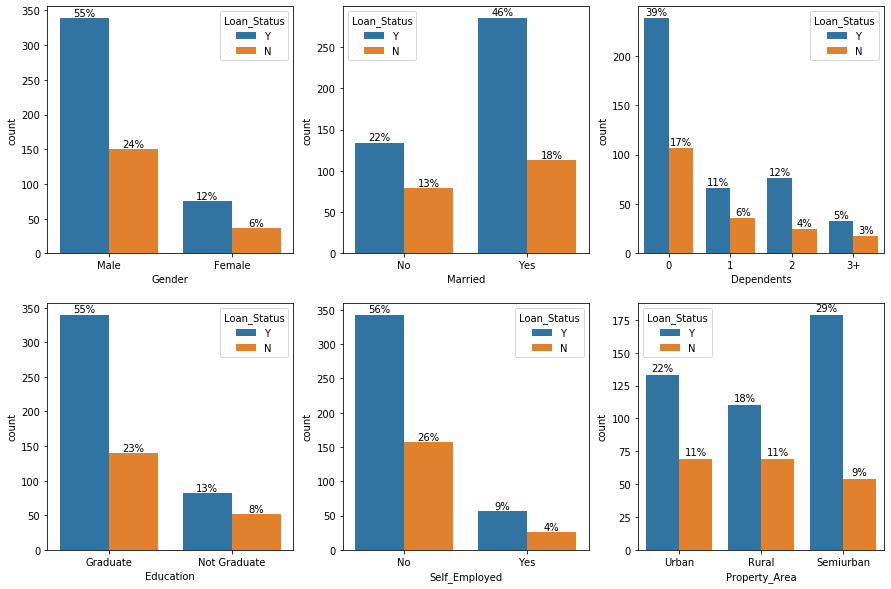

In [6]:
create_categorical_charts(df = train, target_variable='Loan_Status', vars_to_ignore=['Loan_ID'])

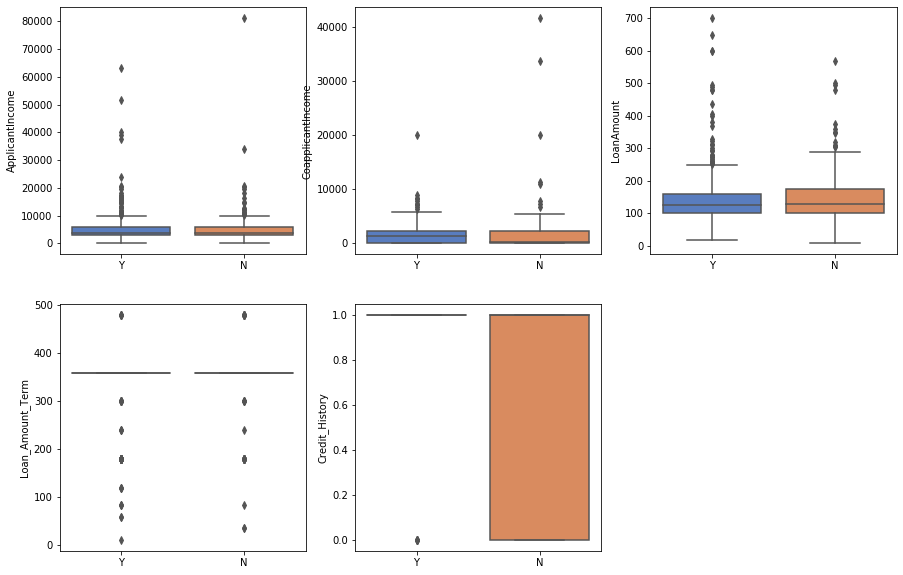

In [7]:
create_numerical_charts(df = train, target_variable='Loan_Status', plot_type='box')

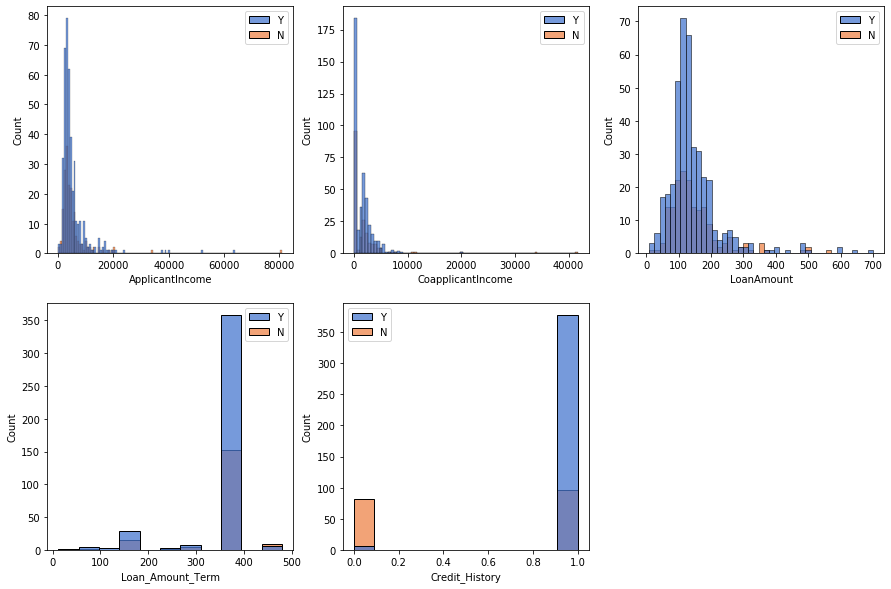

In [8]:
create_numerical_charts(df = train, target_variable='Loan_Status', plot_type='hist')